In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
tracks_df = pd.read_csv('Datafiles/SpotifyFeatures.csv')

### Inspect data

In [3]:
print(tracks_df.head(5))
print(tracks_df.dtypes)
print(tracks_df.describe())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [4]:
tracks_df.sort_values(by='popularity', ascending=False).head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


### Examine distributions and check for correlations

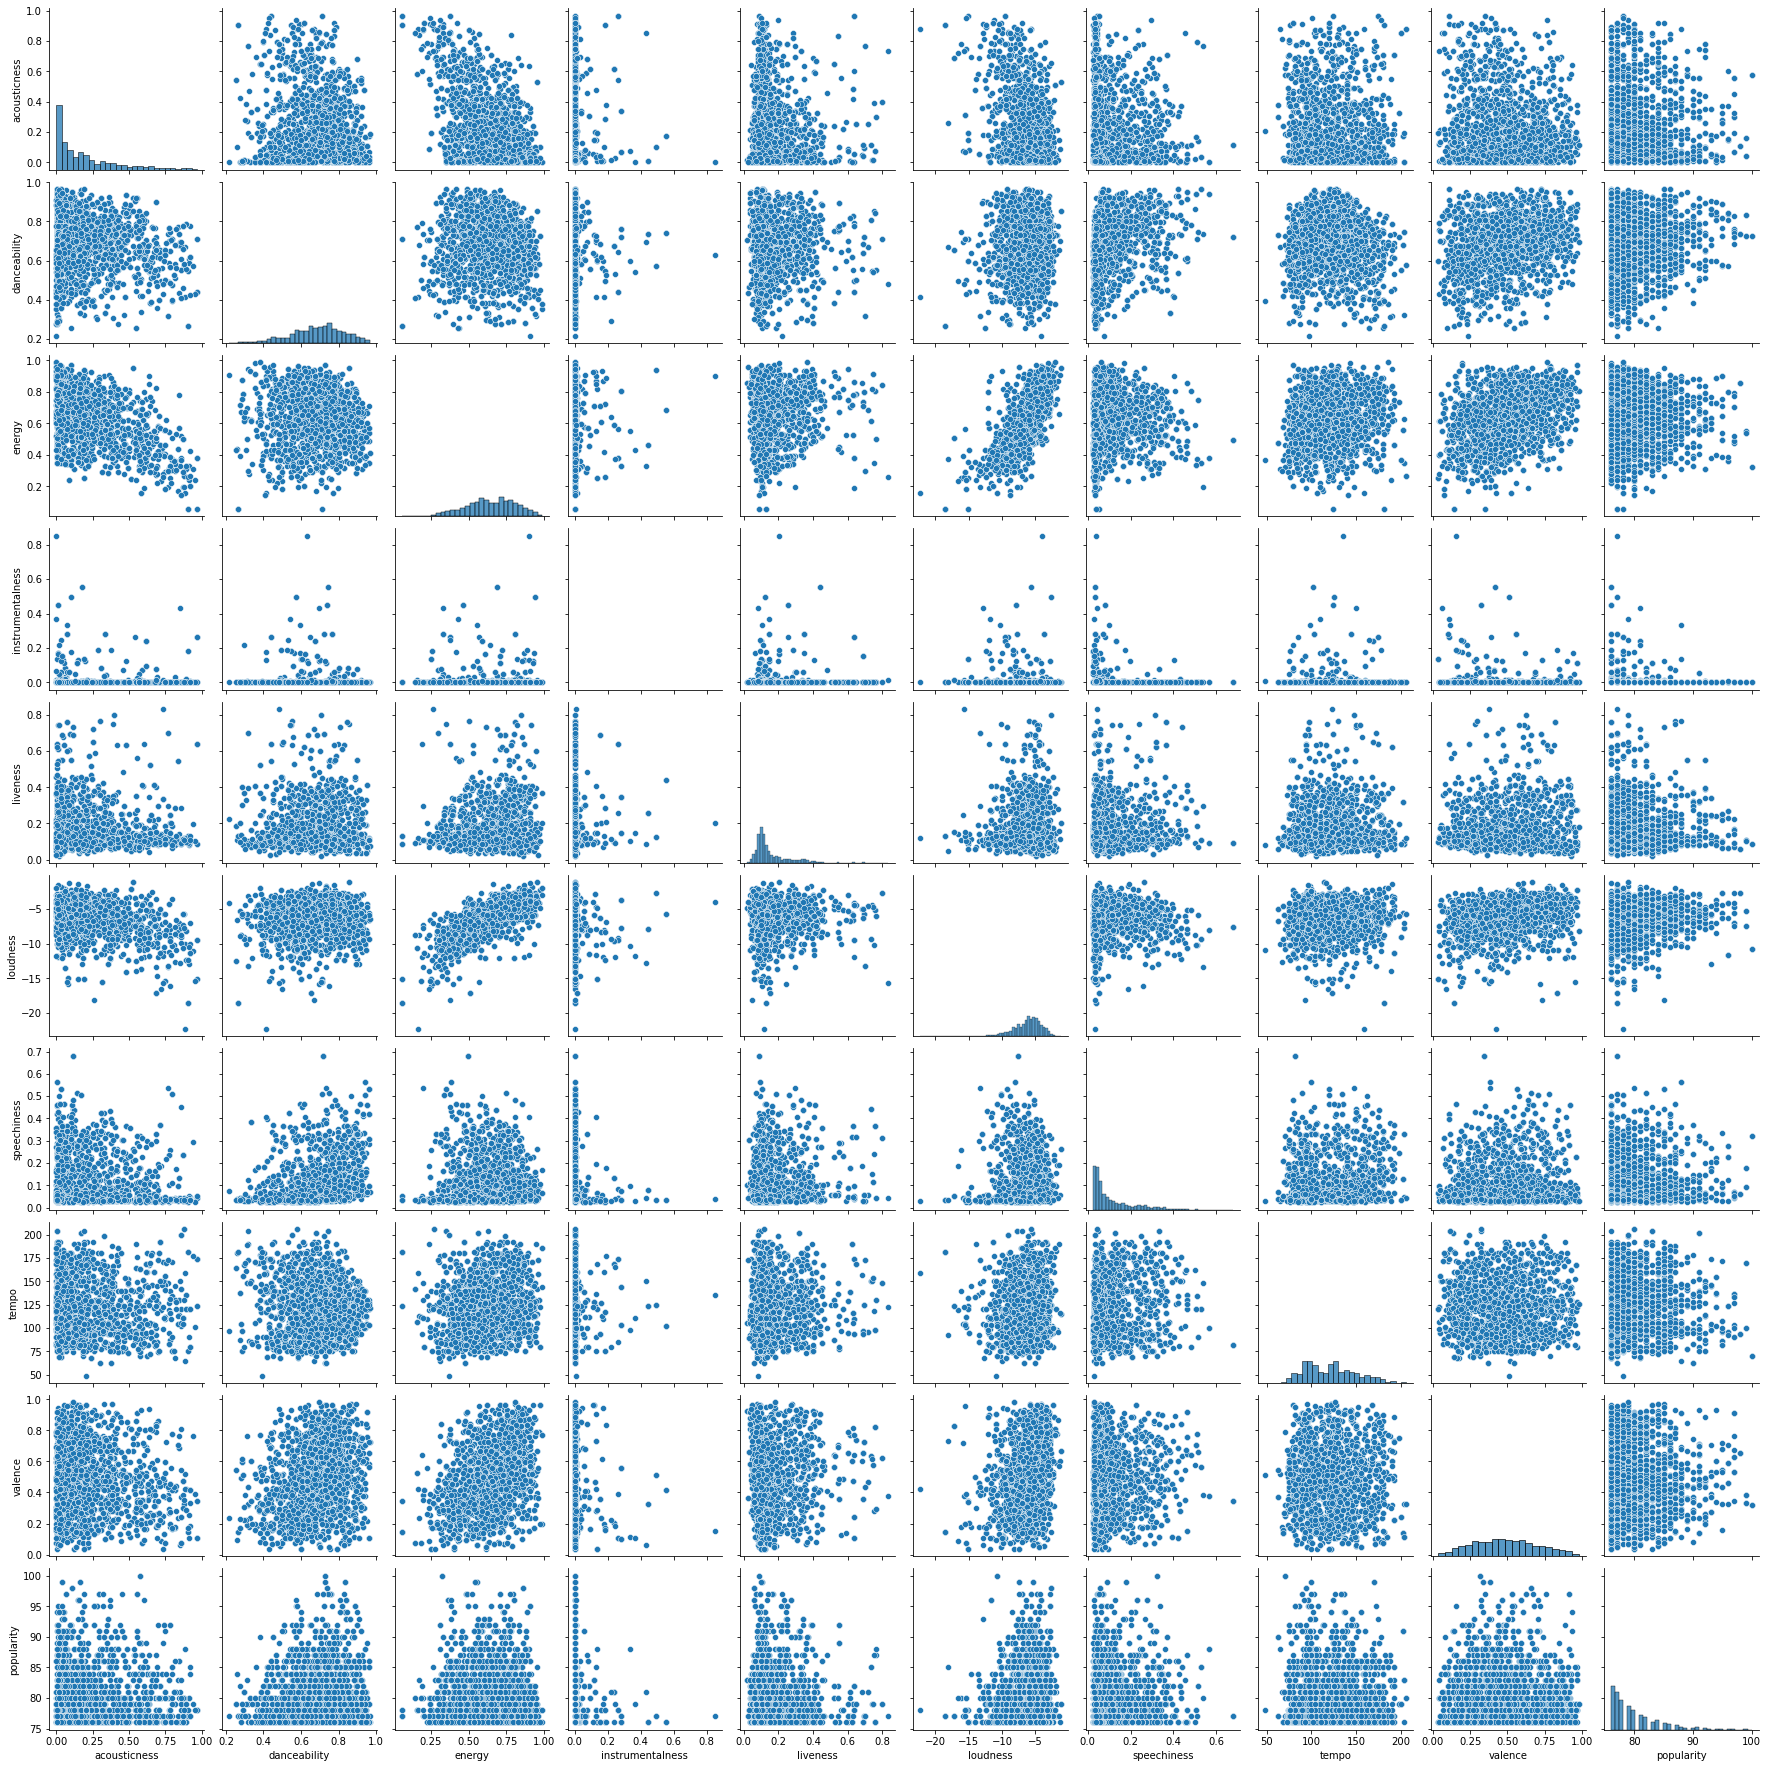

In [5]:
targets = ['popularity']
columns = 'acousticness danceability energy instrumentalness liveness loudness speechiness tempo valence'.split()
popular = tracks_df[tracks_df['popularity'] > 75]

# This pairplot can take a long time, uncomment if necessary...
#sns.pairplot(popular[columns + targets])

Text(0.5, 1.0, 'Correlation Matrix')

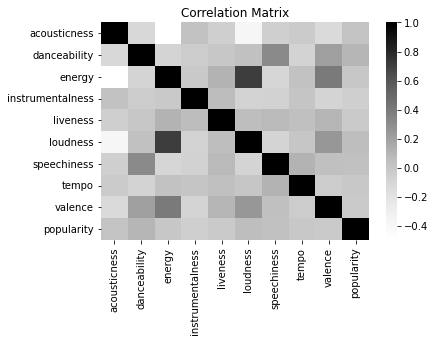

In [6]:
ax = plt.axes()
sns.heatmap(popular[columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Split the data into training and testing dataframes

In [8]:
train, test = train_test_split(popular, test_size=0.2)

### Scale the attribute and target columns

In [9]:
scaler = StandardScaler(copy=False)
train[columns + targets] = scaler.fit_transform(train[columns + targets])
test[columns + targets] = scaler.transform(test[columns + targets])

### Try using Principle Component Analysis
This will reduce the number of attributes from 9 to 3.

In [10]:
pca_components = 3
pca = PCA(n_components=pca_components)
new_train_values = pca.fit_transform(train[columns])
new_test_values = pca.transform(test[columns])

new_columns = []
for index in range(pca_components):
    name = 'pca' + str(index)
    train.loc[:, name] = new_train_values[:, index]
    test.loc[:, name] = new_test_values[:, index]
    new_columns.append(name)

### Check for correlations with derived attributes
(not looking so good...)

Text(0.5, 1.0, 'Correlation Matrix')

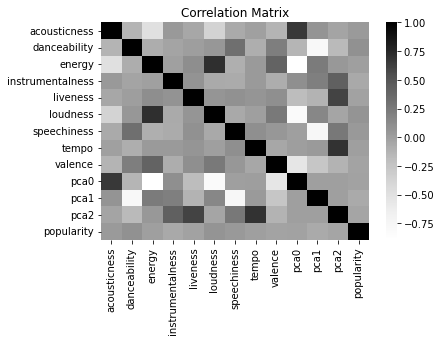

In [11]:
ax = plt.axes()
sns.heatmap(train[columns + new_columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

### Build and train a neural network

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

# Input layer
model.add(Dense(len(new_columns), activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(3, activation='relu'))
#model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20)
model.fit(x=train[new_columns].values,
          y=train[targets].values.ravel(),
          epochs=1000,
          callbacks=[early_stop]
         )

Epoch 1/1000


2022-10-07 09:57:27.633361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


74/74 [==============================] - 0s 758us/step - loss: 1.0090
Epoch 2/1000
74/74 [==============================] - 0s 668us/step - loss: 1.0010
Epoch 3/1000
74/74 [==============================] - 0s 698us/step - loss: 0.9981
Epoch 4/1000
74/74 [==============================] - 0s 670us/step - loss: 0.9973
Epoch 5/1000
74/74 [==============================] - 0s 708us/step - loss: 0.9967
Epoch 6/1000
74/74 [==============================] - 0s 723us/step - loss: 0.9966
Epoch 7/1000
74/74 [==============================] - 0s 662us/step - loss: 0.9966
Epoch 8/1000
74/74 [==============================] - 0s 651us/step - loss: 0.9966
Epoch 9/1000
74/74 [==============================] - 0s 664us/step - loss: 0.9962
Epoch 10/1000
74/74 [==============================] - 0s 705us/step - loss: 0.9961
Epoch 11/1000
74/74 [==============================] - 0s 710us/step - loss: 0.9958
Epoch 12/1000
74/74 [==============================] - 0s 680us/step - loss: 0.9954
Epoch 13/1000


74/74 [==============================] - 0s 653us/step - loss: 0.9830
Epoch 99/1000
74/74 [==============================] - 0s 677us/step - loss: 0.9823
Epoch 100/1000
74/74 [==============================] - 0s 674us/step - loss: 0.9821
Epoch 101/1000
74/74 [==============================] - 0s 753us/step - loss: 0.9828
Epoch 102/1000
74/74 [==============================] - 0s 801us/step - loss: 0.9824
Epoch 103/1000
74/74 [==============================] - 0s 717us/step - loss: 0.9828
Epoch 104/1000
74/74 [==============================] - 0s 647us/step - loss: 0.9825
Epoch 105/1000
74/74 [==============================] - 0s 617us/step - loss: 0.9824
Epoch 106/1000
74/74 [==============================] - 0s 652us/step - loss: 0.9825
Epoch 107/1000
74/74 [==============================] - 0s 635us/step - loss: 0.9825
Epoch 108/1000
74/74 [==============================] - 0s 647us/step - loss: 0.9822
Epoch 109/1000
74/74 [==============================] - 0s 648us/step - loss: 0.9

74/74 [==============================] - 0s 703us/step - loss: 0.9692
Epoch 195/1000
74/74 [==============================] - 0s 641us/step - loss: 0.9692
Epoch 196/1000
74/74 [==============================] - 0s 637us/step - loss: 0.9687
Epoch 197/1000
74/74 [==============================] - 0s 623us/step - loss: 0.9684
Epoch 198/1000
74/74 [==============================] - 0s 621us/step - loss: 0.9685
Epoch 199/1000
74/74 [==============================] - 0s 627us/step - loss: 0.9692
Epoch 200/1000
74/74 [==============================] - 0s 631us/step - loss: 0.9691
Epoch 201/1000
74/74 [==============================] - 0s 640us/step - loss: 0.9685
Epoch 202/1000
74/74 [==============================] - 0s 640us/step - loss: 0.9685
Epoch 203/1000
74/74 [==============================] - 0s 653us/step - loss: 0.9687
Epoch 204/1000
74/74 [==============================] - 0s 652us/step - loss: 0.9685
Epoch 205/1000
74/74 [==============================] - 0s 640us/step - loss: 0.

74/74 [==============================] - 0s 617us/step - loss: 0.9682
Epoch 291/1000
74/74 [==============================] - 0s 619us/step - loss: 0.9679
Epoch 292/1000
74/74 [==============================] - 0s 641us/step - loss: 0.9673
Epoch 293/1000
74/74 [==============================] - 0s 622us/step - loss: 0.9678
Epoch 294/1000
74/74 [==============================] - 0s 641us/step - loss: 0.9675
Epoch 295/1000
74/74 [==============================] - 0s 594us/step - loss: 0.9677
Epoch 296/1000
74/74 [==============================] - 0s 600us/step - loss: 0.9678
Epoch 296: early stopping


<AxesSubplot:>

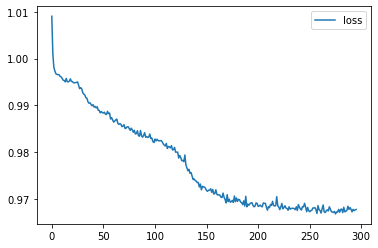

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Examine predictions

In [14]:
predictions = model.predict(test[new_columns])
print(np.hstack([predictions, test[targets], predictions / test[targets]]))

19/19 [==============================] - 0s 670us/step
[[-4.88014743e-02 -1.50178112e-03  3.24957302e+01]
 [-4.88014743e-02  7.08540335e-01 -6.88760708e-02]
 [-4.88014743e-02 -1.50178112e-03  3.24957302e+01]
 ...
 [-7.91989267e-04 -4.74863192e-01  1.66782619e-03]
 [ 8.06749240e-02 -9.48224602e-01 -8.50799734e-02]
 [-4.88014743e-02 -7.11543897e-01  6.85853318e-02]]


In [15]:
# Not performing well at all. To be completed...